In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 30

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
all_transforms = transforms.Compose([transforms.Resize((32,32)),
transforms.ToTensor(),
transforms.Normalize(mean=[0.5, 0.5, 0.5],
std=[0.2, 0.2, 0.2])
])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
train = True,
transform = all_transforms,
download = True)
# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
train = False,
transform = all_transforms,
download=True)
# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
batch_size = batch_size,
shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
batch_size = batch_size,
shuffle = True)

100%|██████████| 170498071/170498071 [00:01<00:00, 93017060.38it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


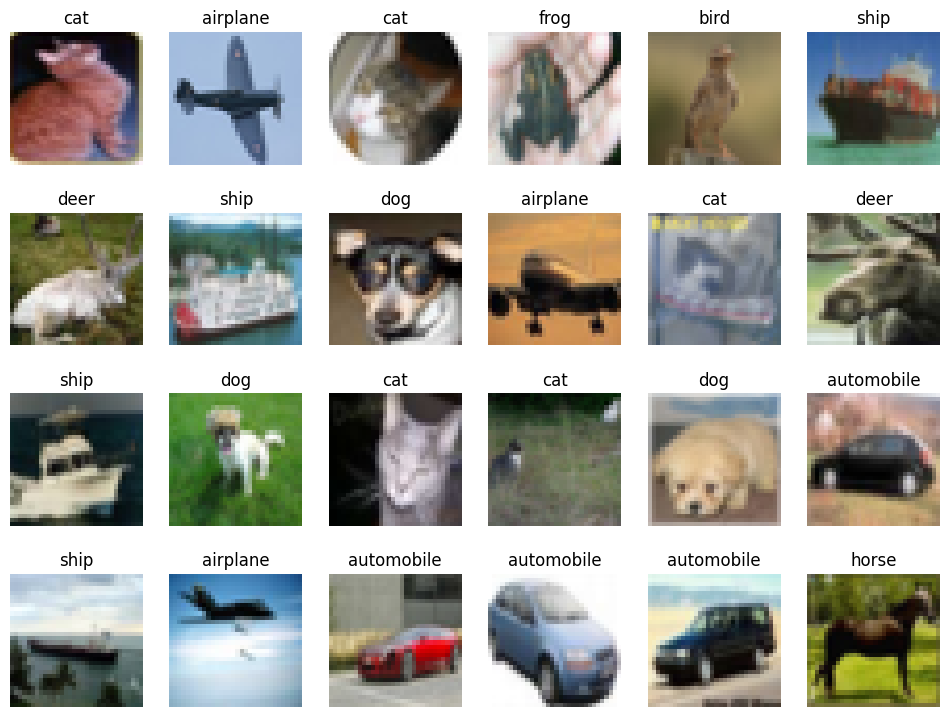

In [ ]:
import matplotlib.pyplot as plt
import random
IDX_TO_LABEL = {v: k for k, v in train_dataset.class_to_idx.items()}
cols = 6
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))
for x in range(rows):
  for y in range(cols):
    rnd_idx = random.randint(1,len(train_dataset.data))
    axs[x, y].set_title(IDX_TO_LABEL[train_dataset.targets[rnd_idx]])
    axs[x, y].imshow(train_dataset.data[rnd_idx])
    axs[x, y].set_axis_off()
plt.show()

In [ ]:
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    # Progresses data across layers
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [ ]:
model = ConvNeuralNet(num_classes)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step = len(train_loader)

In [ ]:
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/30], Loss: 1.6415
Epoch [2/30], Loss: 1.4934
Epoch [3/30], Loss: 1.0814
Epoch [4/30], Loss: 0.6837
Epoch [5/30], Loss: 1.6226
Epoch [6/30], Loss: 1.1143
Epoch [7/30], Loss: 1.7116
Epoch [8/30], Loss: 0.7912
Epoch [9/30], Loss: 0.7839
Epoch [10/30], Loss: 1.0353
Epoch [11/30], Loss: 0.5002
Epoch [12/30], Loss: 0.3628
Epoch [13/30], Loss: 0.3916
Epoch [14/30], Loss: 0.4970
Epoch [15/30], Loss: 1.0098
Epoch [16/30], Loss: 0.6788
Epoch [17/30], Loss: 1.4751
Epoch [18/30], Loss: 0.6194
Epoch [19/30], Loss: 0.7205
Epoch [20/30], Loss: 0.5642
Epoch [21/30], Loss: 0.6710
Epoch [22/30], Loss: 1.0317
Epoch [23/30], Loss: 0.3044
Epoch [24/30], Loss: 0.7647
Epoch [25/30], Loss: 0.7520
Epoch [26/30], Loss: 0.9500
Epoch [27/30], Loss: 0.6178
Epoch [28/30], Loss: 0.3374
Epoch [29/30], Loss: 0.3293
Epoch [30/30], Loss: 0.6475


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} train images: {} %'.format(3000, 100 * correct / total))

Accuracy of the network on the 3000 train images: 90.856 %


In [11]:
import torch
RegFile = "model.pth"
torch.save(model, RegFile)